# Comparison


In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option("display.max_columns", None)
sb.set_style("darkgrid")

In [2]:
from scripts.params import get_params

params = get_params()

from scripts.aux_functions import subset_of_columns, plot_forecasts, plot_residuals

In [3]:
dataroute = params["dataroute"]
resultsroute = params["resultsroute"]
dumproute = params["dumproute"]
graphsroute = params["graphsroute"]

In [4]:
name = f'finaldf_test_{params["tablename"]}.pickle'
filename = os.path.join(dataroute, name)
with open(filename, "rb") as handle:
    df_test = pickle.load(handle)

In [5]:
forecasts = "forecasts_by_stock_" + params["tablename"] + ".pickle"
filename = os.path.join(resultsroute, forecasts)
with open(filename, "rb") as handle:
    forecasts_by_stock = pickle.load(handle)

In [6]:
residuals = "residuals_by_stock_" + params["tablename"] + ".pickle"
filename = os.path.join(resultsroute, forecasts)
with open(filename, "rb") as handle:
    residuals_by_stock = pickle.load(handle)

# Forecasts

In [7]:
agg_df = pd.read_csv(
    os.path.join(resultsroute, f"""aggregate_results_df_{params["tablename"]}.csv"""),
    index_col=0,
)

k = 3
top_k = agg_df.iloc[0].nsmallest(k).index.to_list()

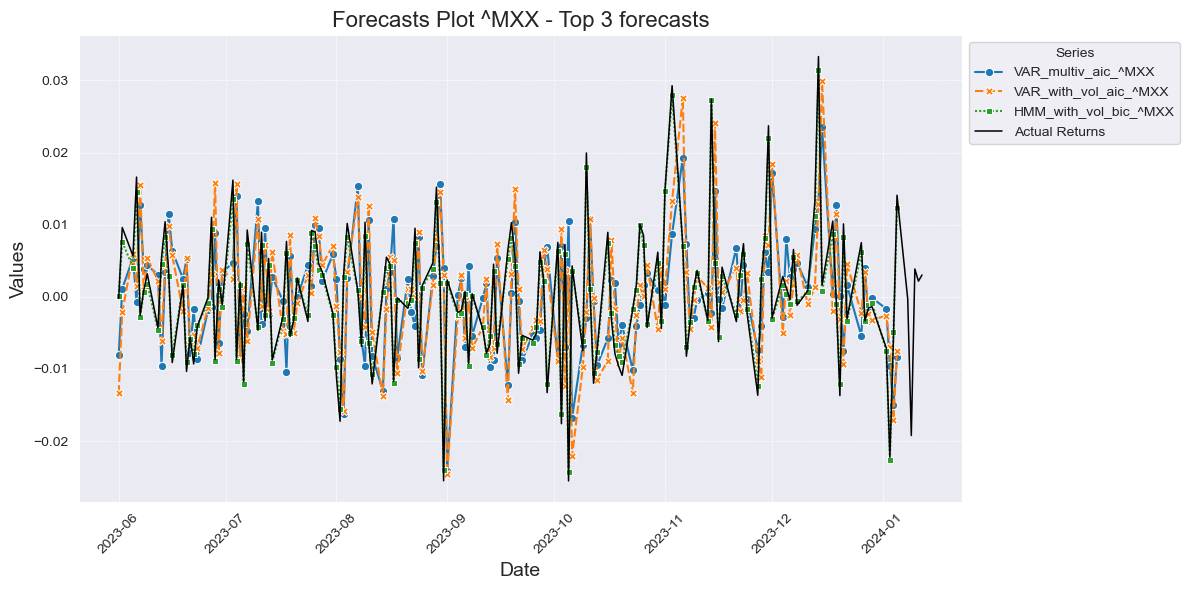

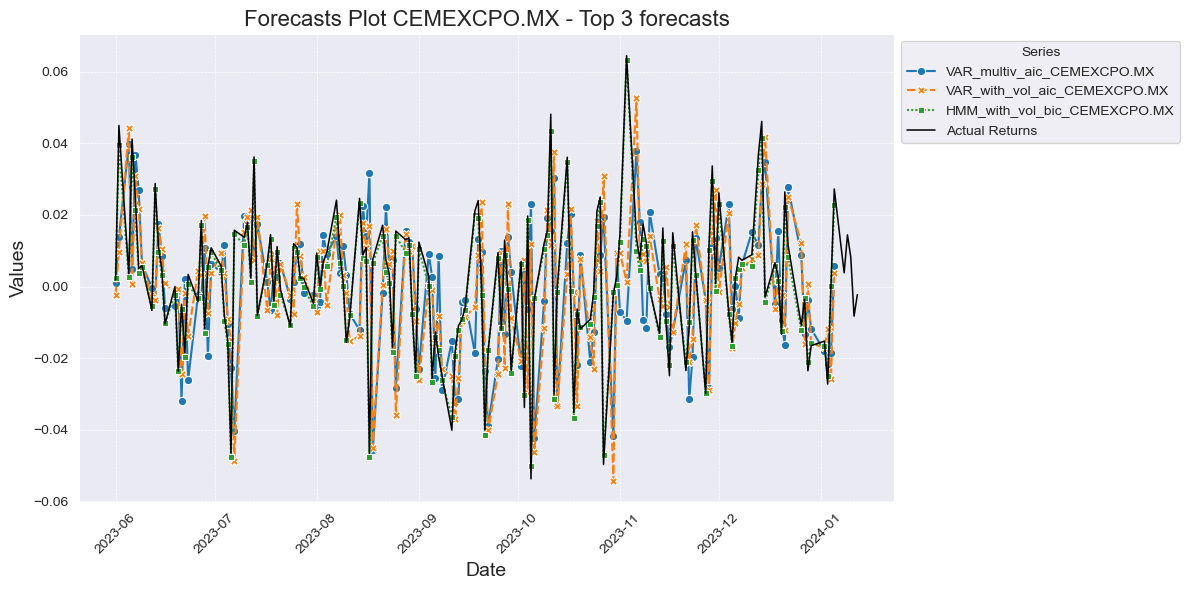

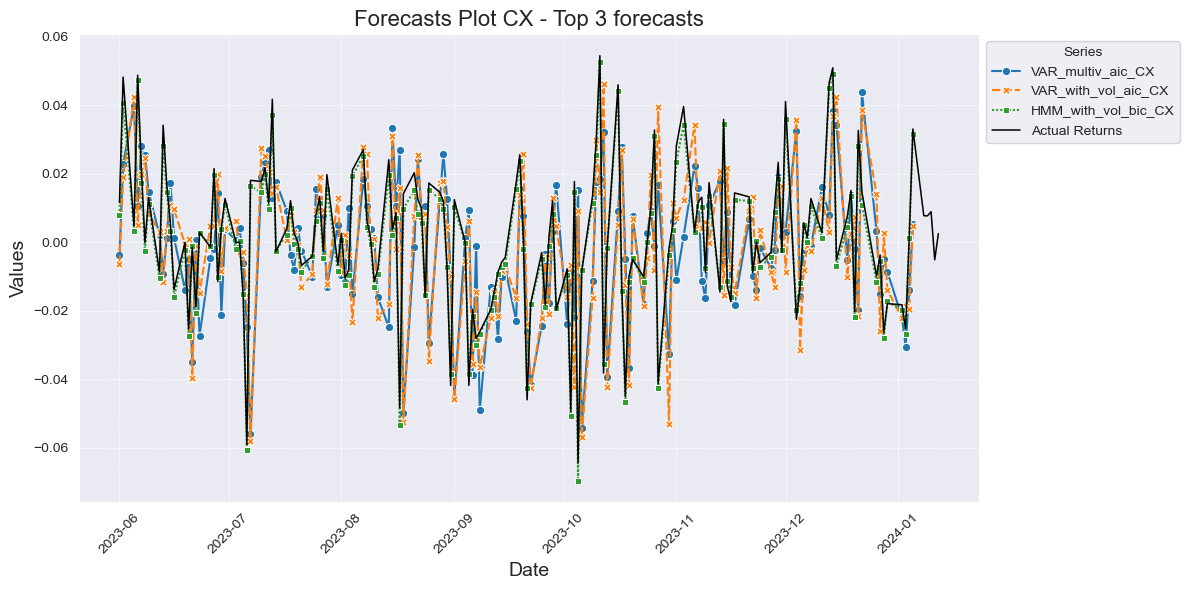

In [8]:
for ticker in params["tickerlist"]:
    fig = plot_forecasts(df_test, forecasts_by_stock, ticker, top_k)
    fig.savefig(os.path.join(graphsroute, "forecasts", f"{ticker}.png"))

# Residuals

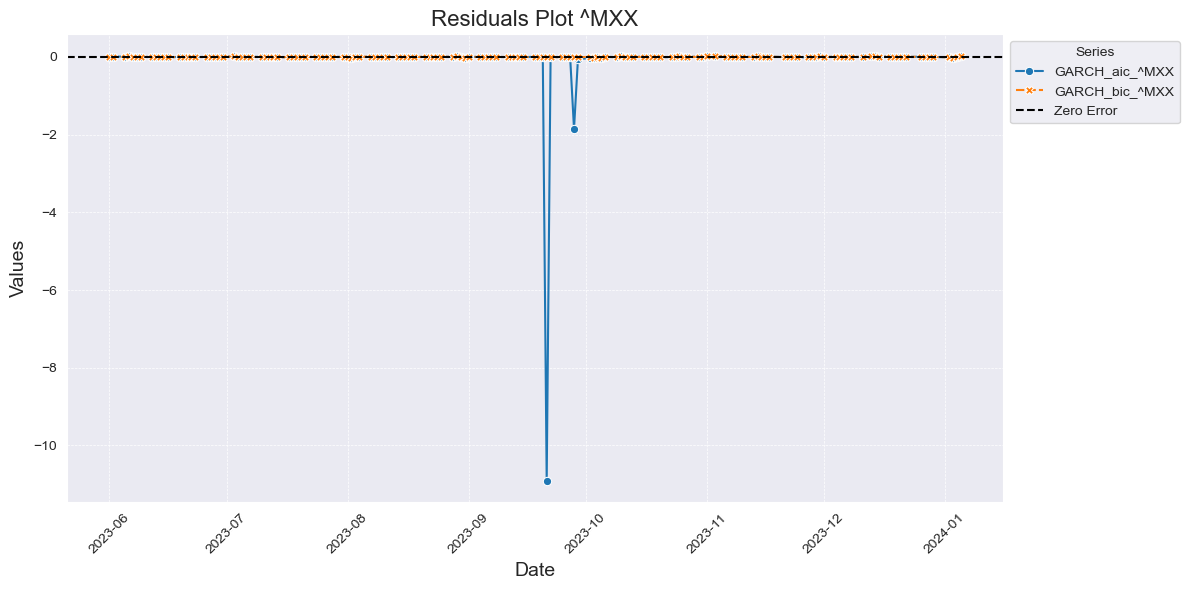

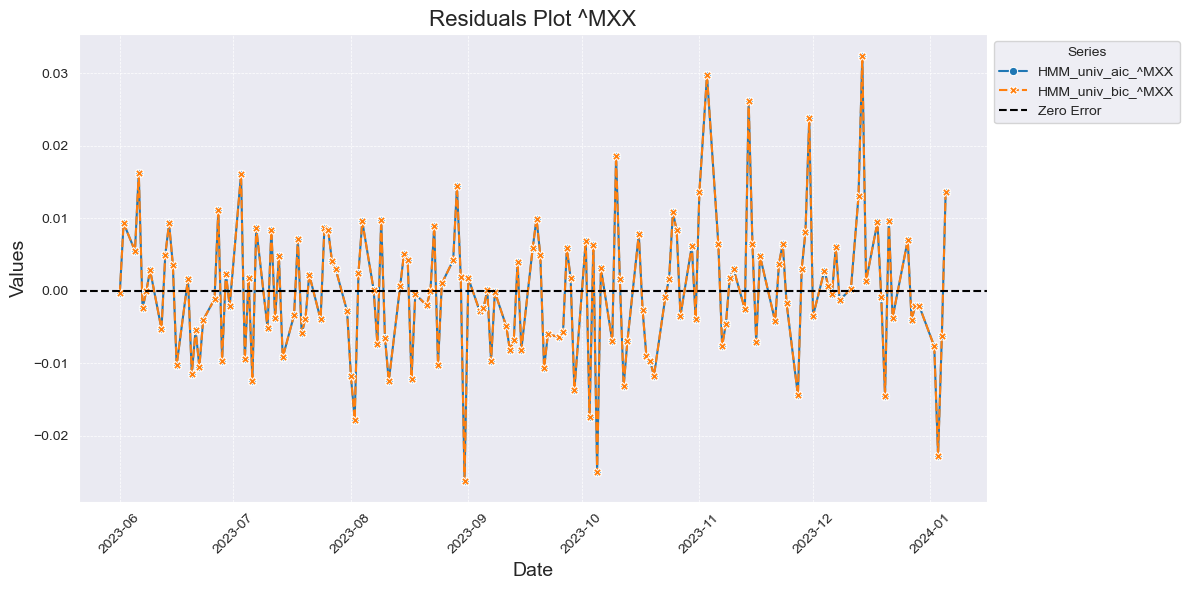

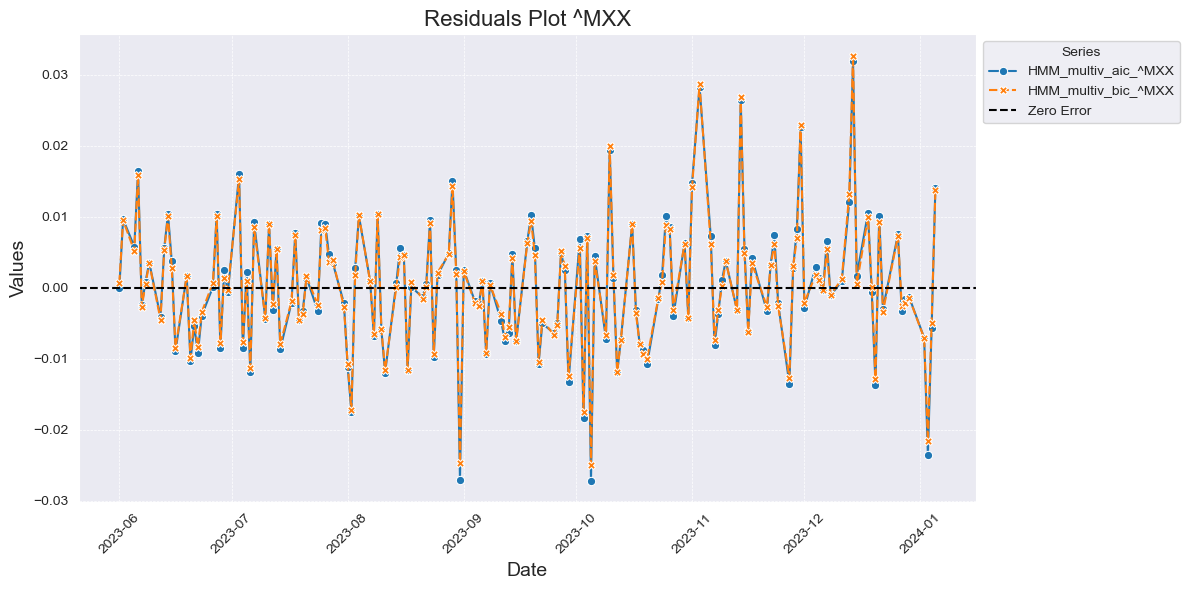

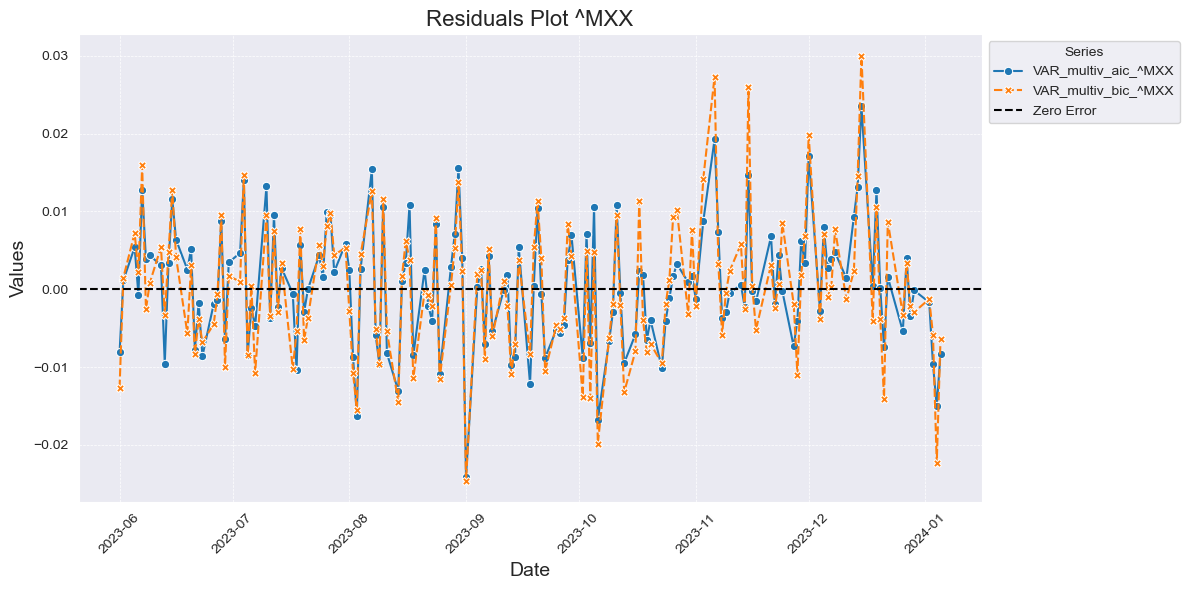

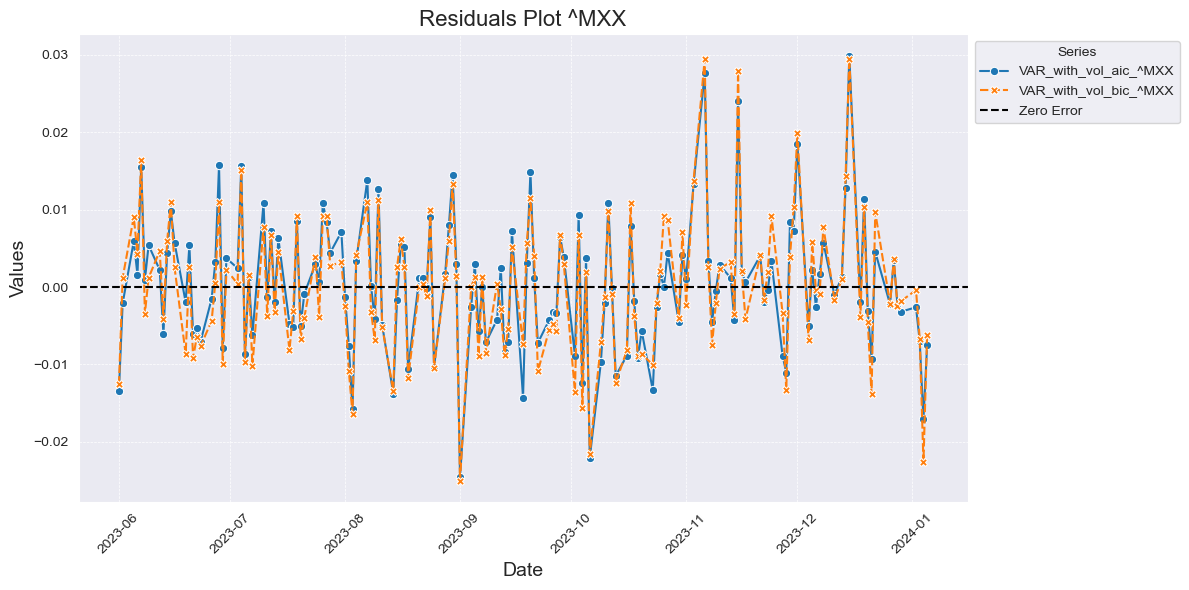

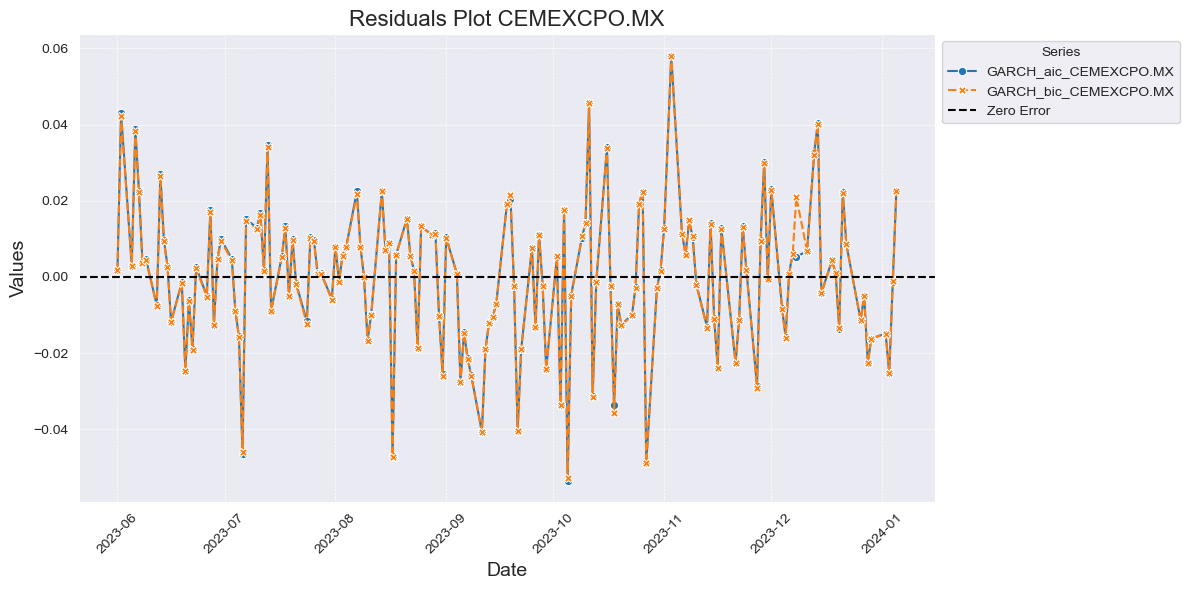

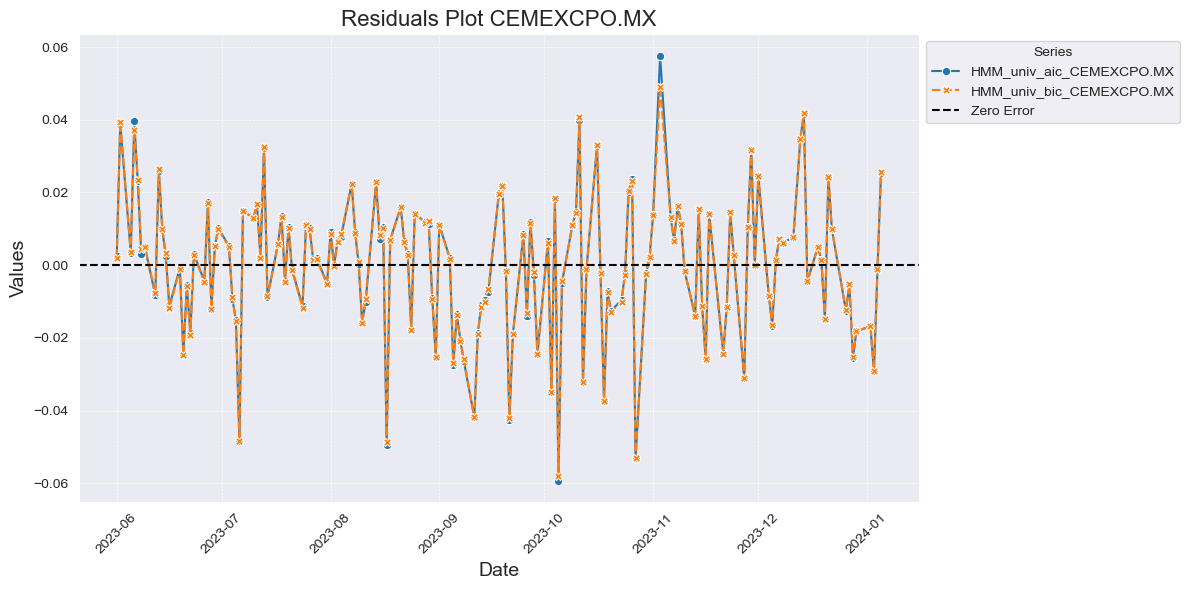

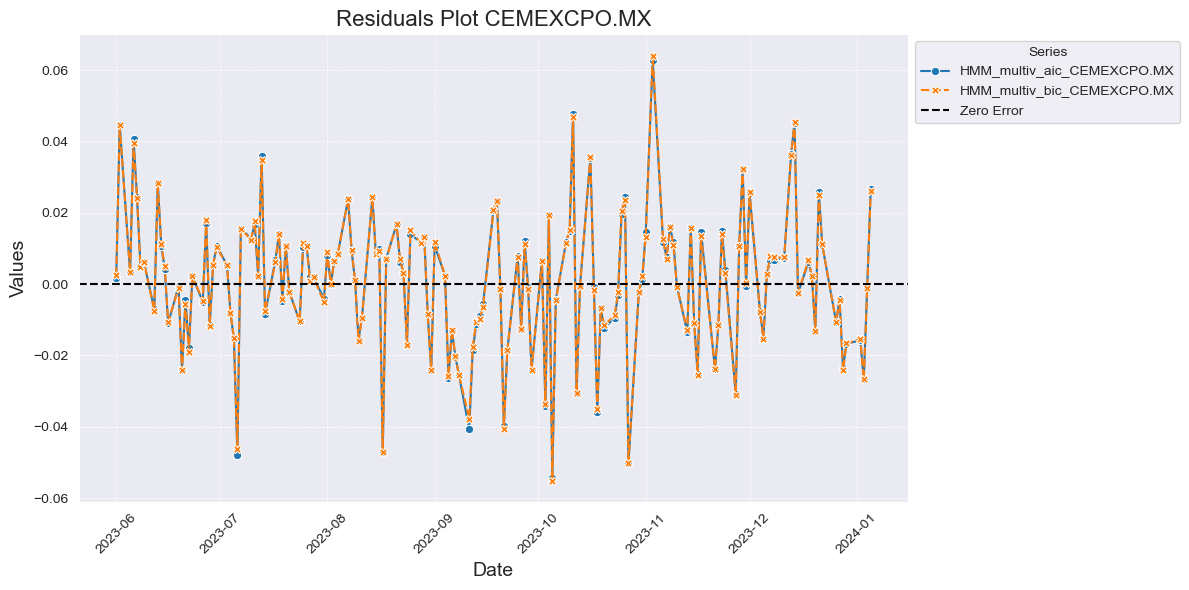

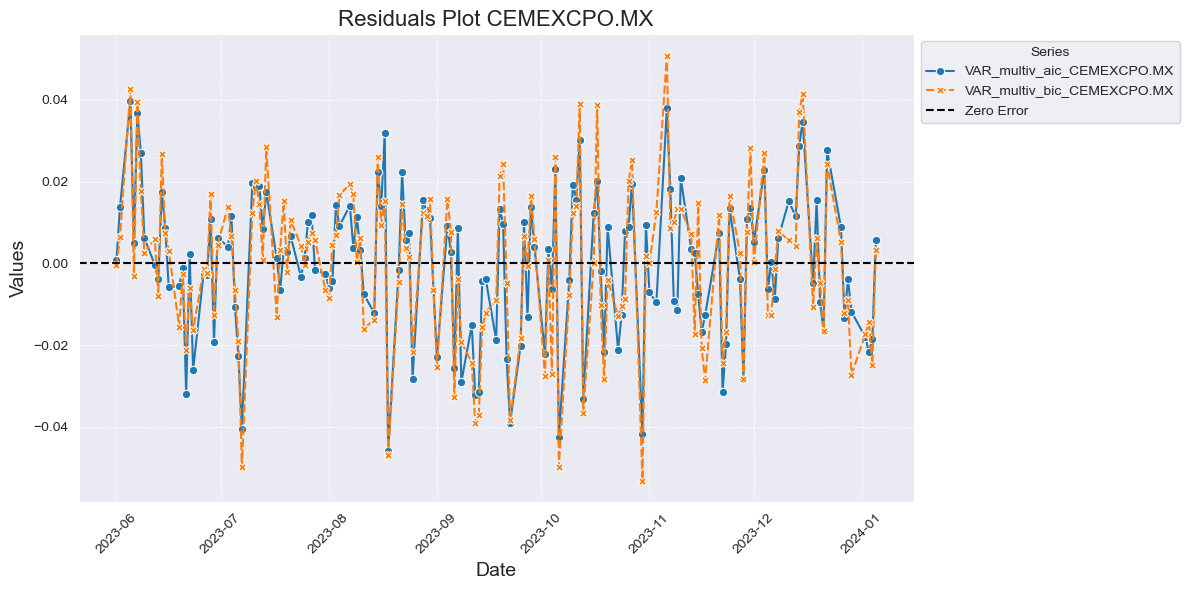

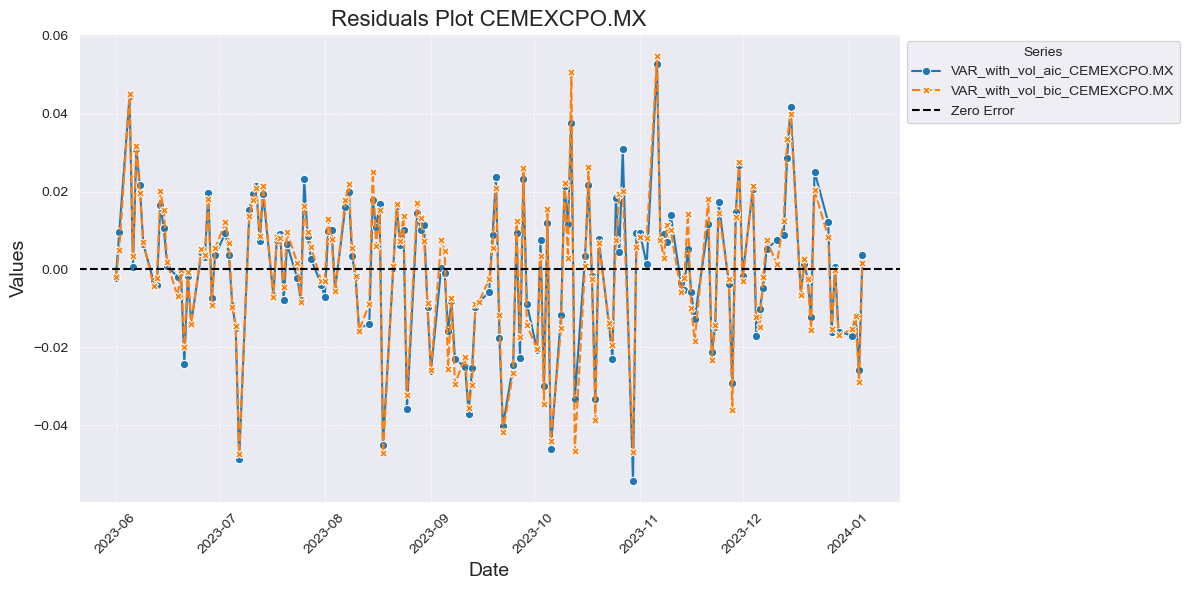

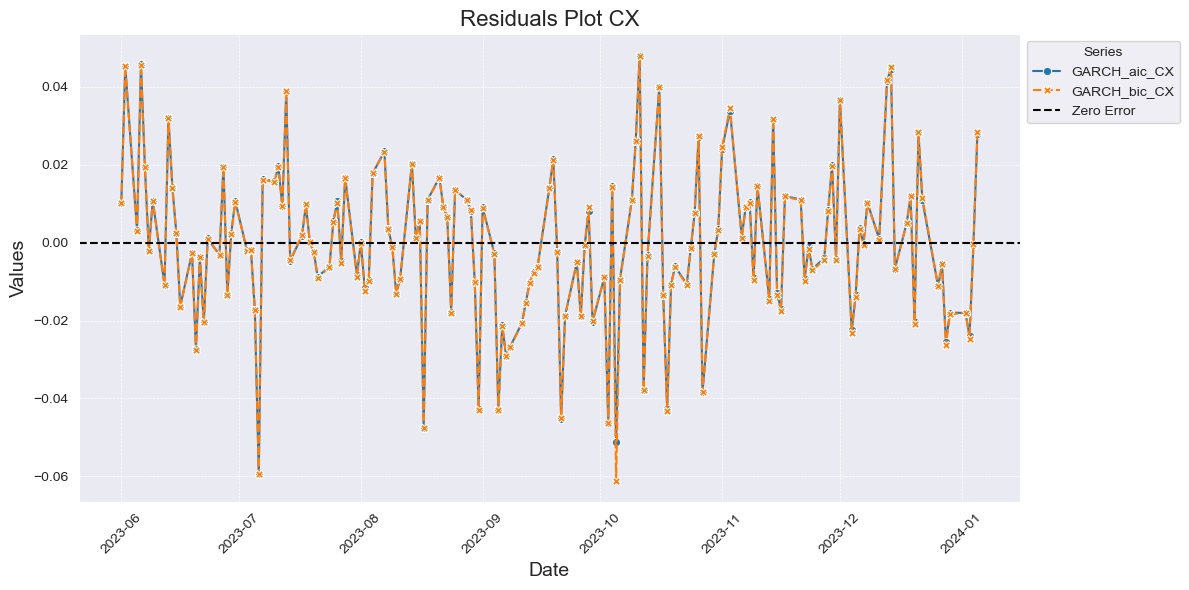

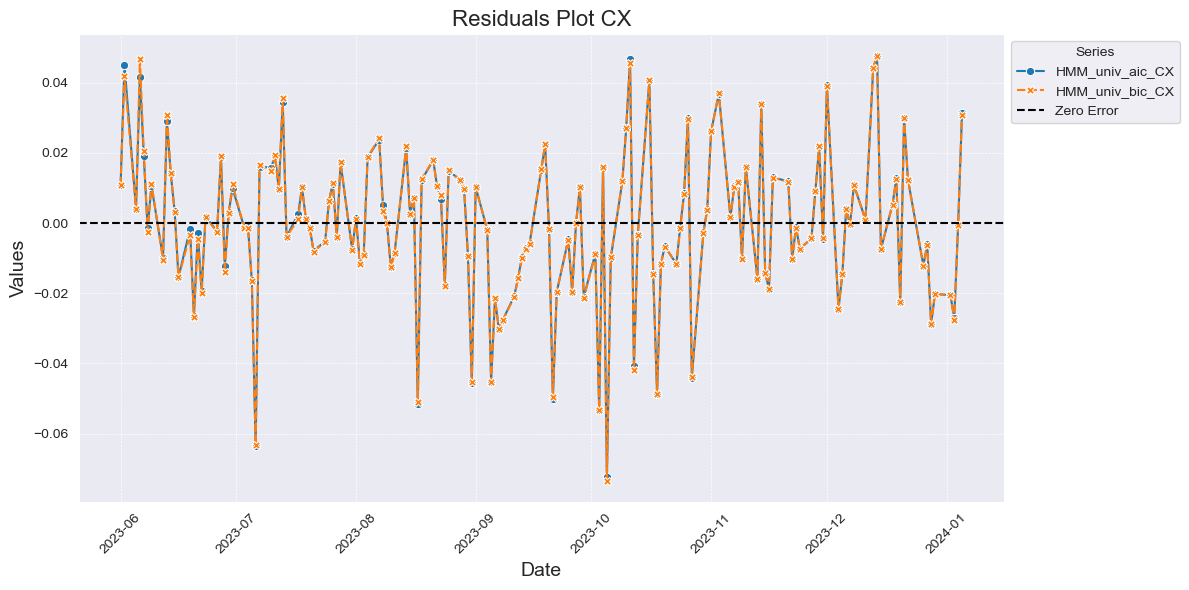

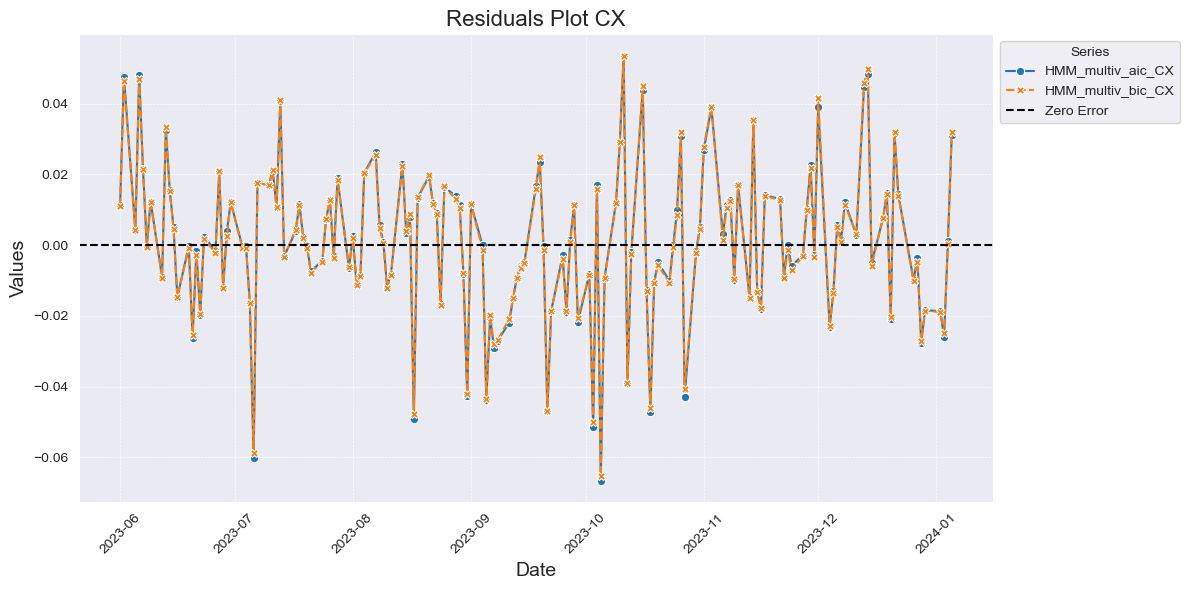

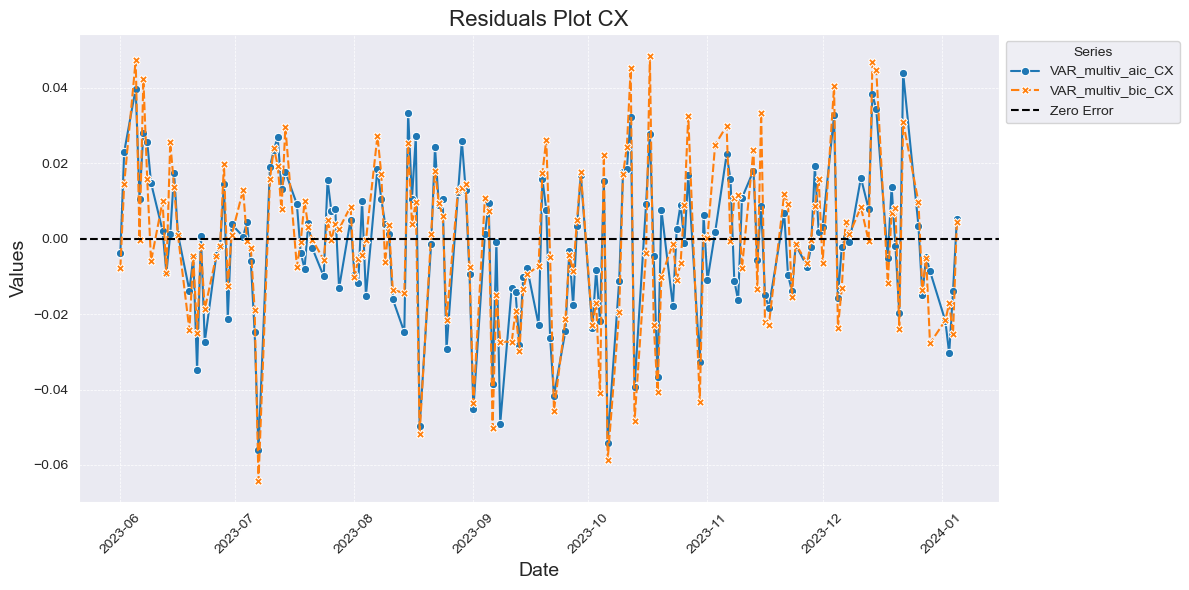

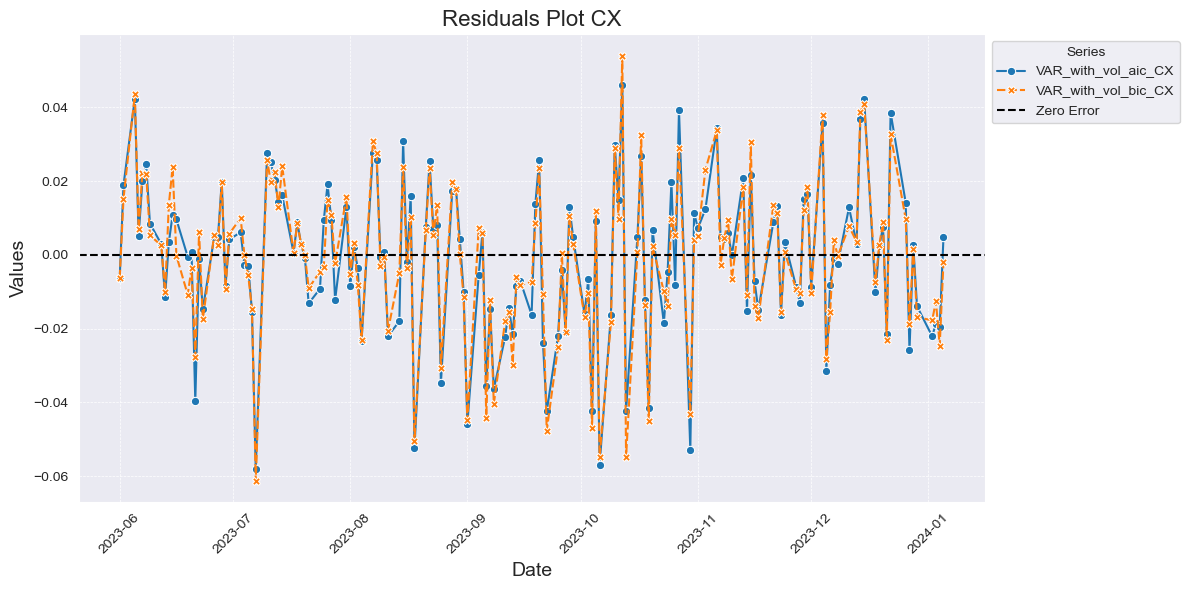

In [9]:
for ticker in params["tickerlist"]:
    for model_type in params["model_list"]:
        resdf = subset_of_columns(residuals_by_stock[ticker], model_type)
        fig = plot_residuals(resdf, ticker, show=False, return_fig=True)
        fig.savefig(os.path.join(graphsroute, "residuals", model_type, f"{ticker}.png"))

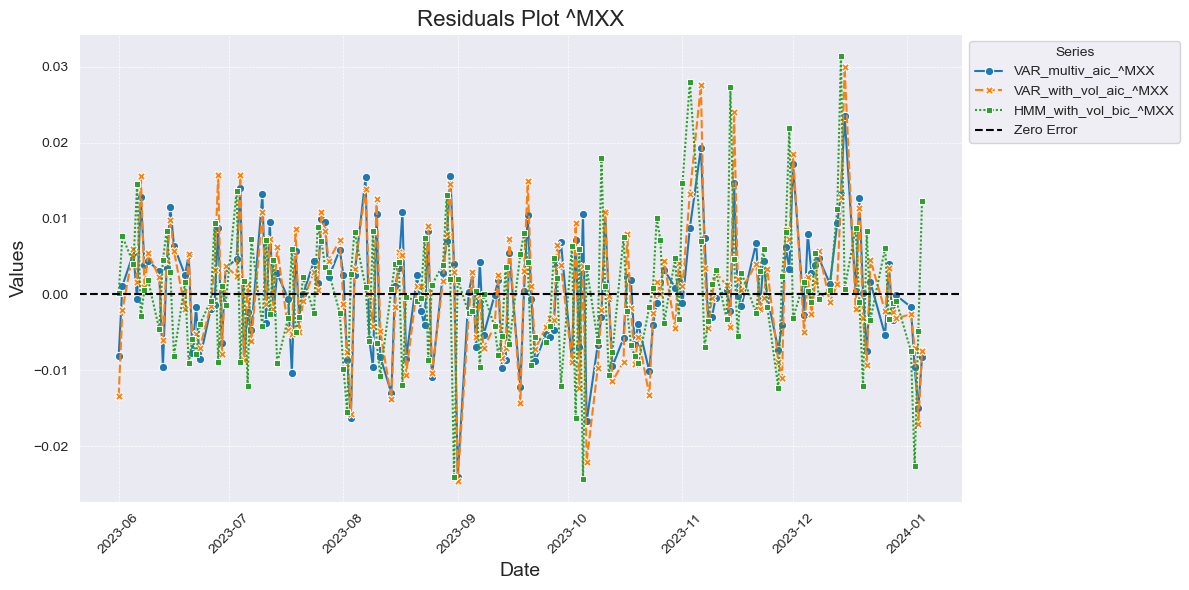

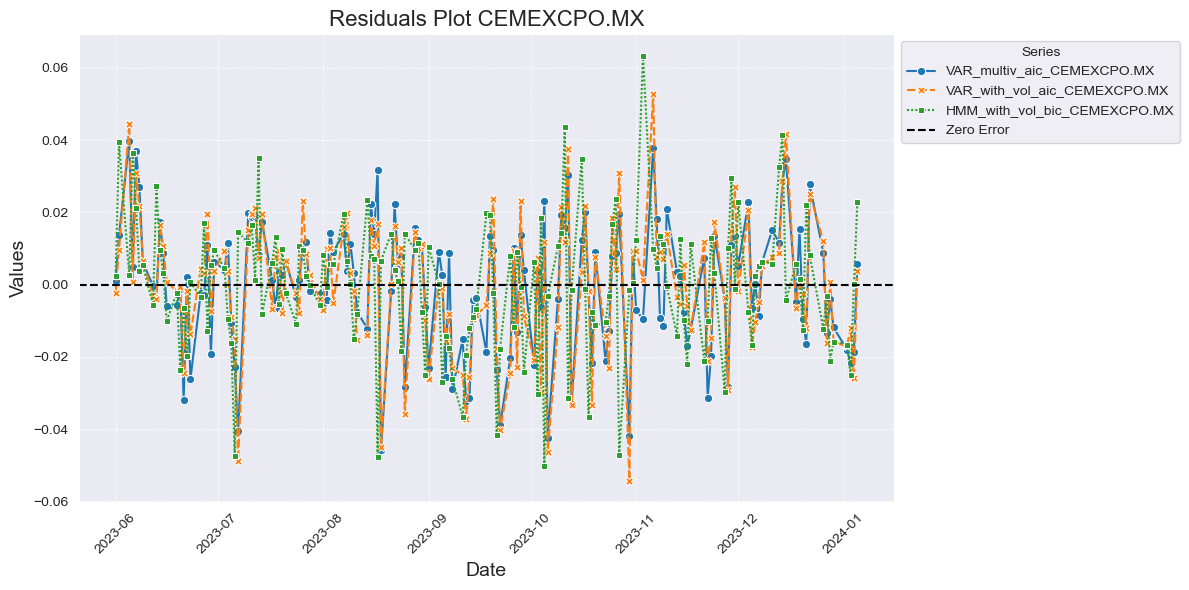

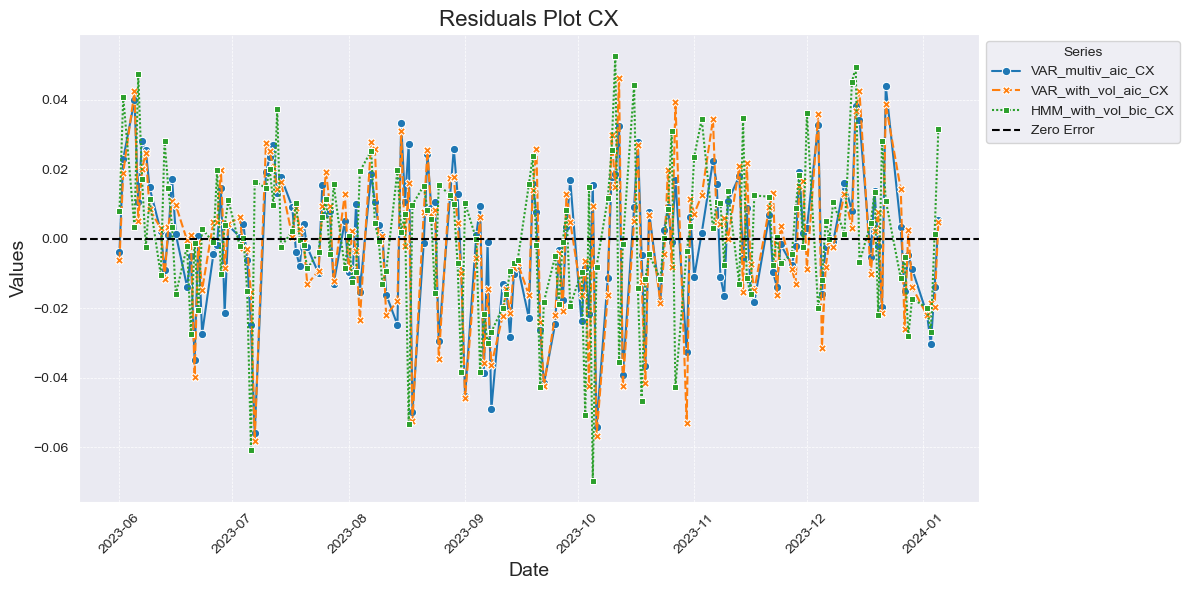

In [10]:
for ticker in params["tickerlist"]:
    resdf=pd.DataFrame()
    for model_type in top_k:
        resdf = pd.concat([resdf,subset_of_columns(residuals_by_stock[ticker], model_type)])
    fig = plot_residuals(resdf, ticker, show=False, return_fig=True)
    fig.savefig(os.path.join(graphsroute, "residuals", f"top_{k}_{ticker}.png"))